In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
data = pd.read_csv("DataCSV.csv")
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2/12/2020 14:13,33366.0,1068.0,2686.0
1,Guangdong,Mainland China,2/12/2020 12:23,1219.0,1.0,275.0
2,Henan,Mainland China,2/12/2020 14:13,1135.0,8.0,246.0
3,Zhejiang,Mainland China,2/12/2020 10:13,1131.0,0.0,321.0
4,Hunan,Mainland China,2/12/2020 12:43,946.0,2.0,304.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  51 non-null     object 
 1   Country/Region  52 non-null     object 
 2   Last Update     52 non-null     object 
 3   Confirmed       52 non-null     float64
 4   Deaths          52 non-null     float64
 5   Recovered       51 non-null     float64
dtypes: float64(3), object(3)
memory usage: 5.5+ KB


In [47]:
data['Last Update'].unique()

array(['2/12/2020 14:13', '2/12/2020 12:23', '2/12/2020 10:13',
       '2/12/2020 12:43', '2/12/2020 1:23', '2/12/2020 8:53',
       '2/12/2020 11:13', '2/12/2020 2:43', '2/12/2020 6:23',
       '2/12/2020 11:53', '2/12/2020 15:03', '2/12/2020 4:23',
       '2/12/2020 9:43', '2/12/2020 13:33', '2/12/2020 1:43',
       '2/12/2020 9:53', '2/11/2020 16:43', '2/11/2020 18:43',
       '2/12/2020 14:43', '2/12/2020 8:03', '2/11/2020 3:13',
       '2/9/2020 9:13', '2/11/2020 19:33', '2/8/2020 9:53',
       '2/10/2020 19:03', '2/12/2020 0:33', '2/9/2020 19:33',
       '2/6/2020 3:13', '2/1/2020 18:12', '2/7/2020 5:43',
       '2/2/2020 22:33', '2/4/2020 0:13', '2/12/2020 6:43',
       '2/9/2020 19:03', nan], dtype=object)

In [48]:
latest_date = '2/9/2020 19:03'
data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
51,Chicago,US,2/9/2020 19:03,2.0,0.0,2.0


In [49]:
unique_countries = data[data.Deaths>0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array(['Hong Kong', 'Mainland China'], dtype=object)

In [51]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-51-4c01da4f2e8c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed>0][data['Last Update']==latest_date].Confirmed.sum())


In [52]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Mainland China', 2.0), ('Hong Kong', 2.0)}


In [53]:
unique_provinces = data['Province/State'][data.Confirmed>1].unique()
unique_provinces

array(['Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
       'Jiangxi', 'Jiangsu', 'Chongqing', 'Shandong', 'Sichuan',
       'Heilongjiang', 'Beijing', 'Shanghai', 'Fujian', 'Hebei',
       'Shaanxi', 'Guangxi', nan, 'Hainan', 'Yunnan', 'Guizhou', 'Shanxi',
       'Liaoning', 'Tianjin', 'Gansu', 'Jilin', 'Mongolia', 'Xinjiang',
       'Ningxia', 'Hong Kong', 'East-Region', 'Bangkok', 'Saitama',
       'Gangwon', 'Qinghai', 'Selanggor', 'Taiwan', 'Berlin', 'Lam Dong',
       'Paris', 'Macau', 'London', 'Abu Dhabi', 'Queensland',
       'New South Wales', 'Victoria', 'British Columbia',
       'South Australia', 'Toronto', 'Chicago'], dtype=object)

In [54]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-54-d611d3719f0b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())


In [55]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Jilin', 0.0), ('Hunan', 0.0), ('Xinjiang', 0.0), ('Liaoning', 0.0), ('Macau', 0.0), ('Fujian', 0.0), ('East-Region', 0.0), ('Heilongjiang', 0.0), ('Lam Dong', 0.0), ('Jiangxi', 0.0), ('Berlin', 0.0), ('Shanxi', 0.0), ('Sichuan', 0.0), ('Guizhou', 0.0), ('British Columbia', 0.0), ('Taiwan', 0.0), ('Jiangsu', 0.0), ('Shanghai', 0.0), ('Mongolia', 0.0), ('Queensland', 0.0), ('Shandong', 0.0), ('Shaanxi', 0.0), ('Selanggor', 0.0), ('Gangwon', 0.0), ('Hubei', 0.0), ('Zhejiang', 0.0), ('Abu Dhabi', 0.0), ('Chicago', 2.0), ('Paris', 0.0), ('Bangkok', 0.0), ('Henan', 0.0), ('Qinghai', 0.0), ('Hebei', 0.0), ('Victoria', 0.0), ('Anhui', 0.0), ('Hainan', 0.0), ('Gansu', 0.0), ('South Australia', 0.0), (nan, 0.0), ('Yunnan', 0.0), ('Guangdong', 0.0), ('Tianjin', 0.0), ('London', 0.0), ('Toronto', 0.0), ('Chongqing', 0.0), ('Saitama', 0.0), ('Beijing', 0.0), ('Guangxi', 0.0), ('Hong Kong', 0.0), ('New South Wales', 0.0), ('Ningxia', 0.0)}


In [56]:
nan_indicies = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indicies.append(i)

In [57]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [59]:
for i in nan_indicies:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Hubei',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'Hunan',
 'Anhui',
 'Jiangxi',
 'Jiangsu',
 'Chongqing',
 'Shandong',
 'Sichuan',
 'Heilongjiang',
 'Beijing',
 'Shanghai',
 'Fujian',
 'Hebei',
 'Shaanxi',
 'Guangxi',
 'Hainan',
 'Yunnan',
 'Guizhou',
 'Shanxi',
 'Liaoning',
 'Tianjin',
 'Gansu',
 'Jilin',
 'Mongolia',
 'Xinjiang',
 'Ningxia',
 'Hong Kong',
 'East-Region',
 'Bangkok',
 'Saitama',
 'Gangwon',
 'Qinghai',
 'Selanggor',
 'Taiwan',
 'Berlin',
 'Lam Dong',
 'Paris',
 'Macau',
 'London',
 'Abu Dhabi',
 'Queensland',
 'New South Wales',
 'Victoria',
 'British Columbia',
 'South Australia',
 'Toronto',
 'Chicago']

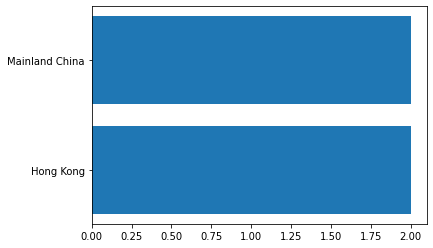

In [60]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

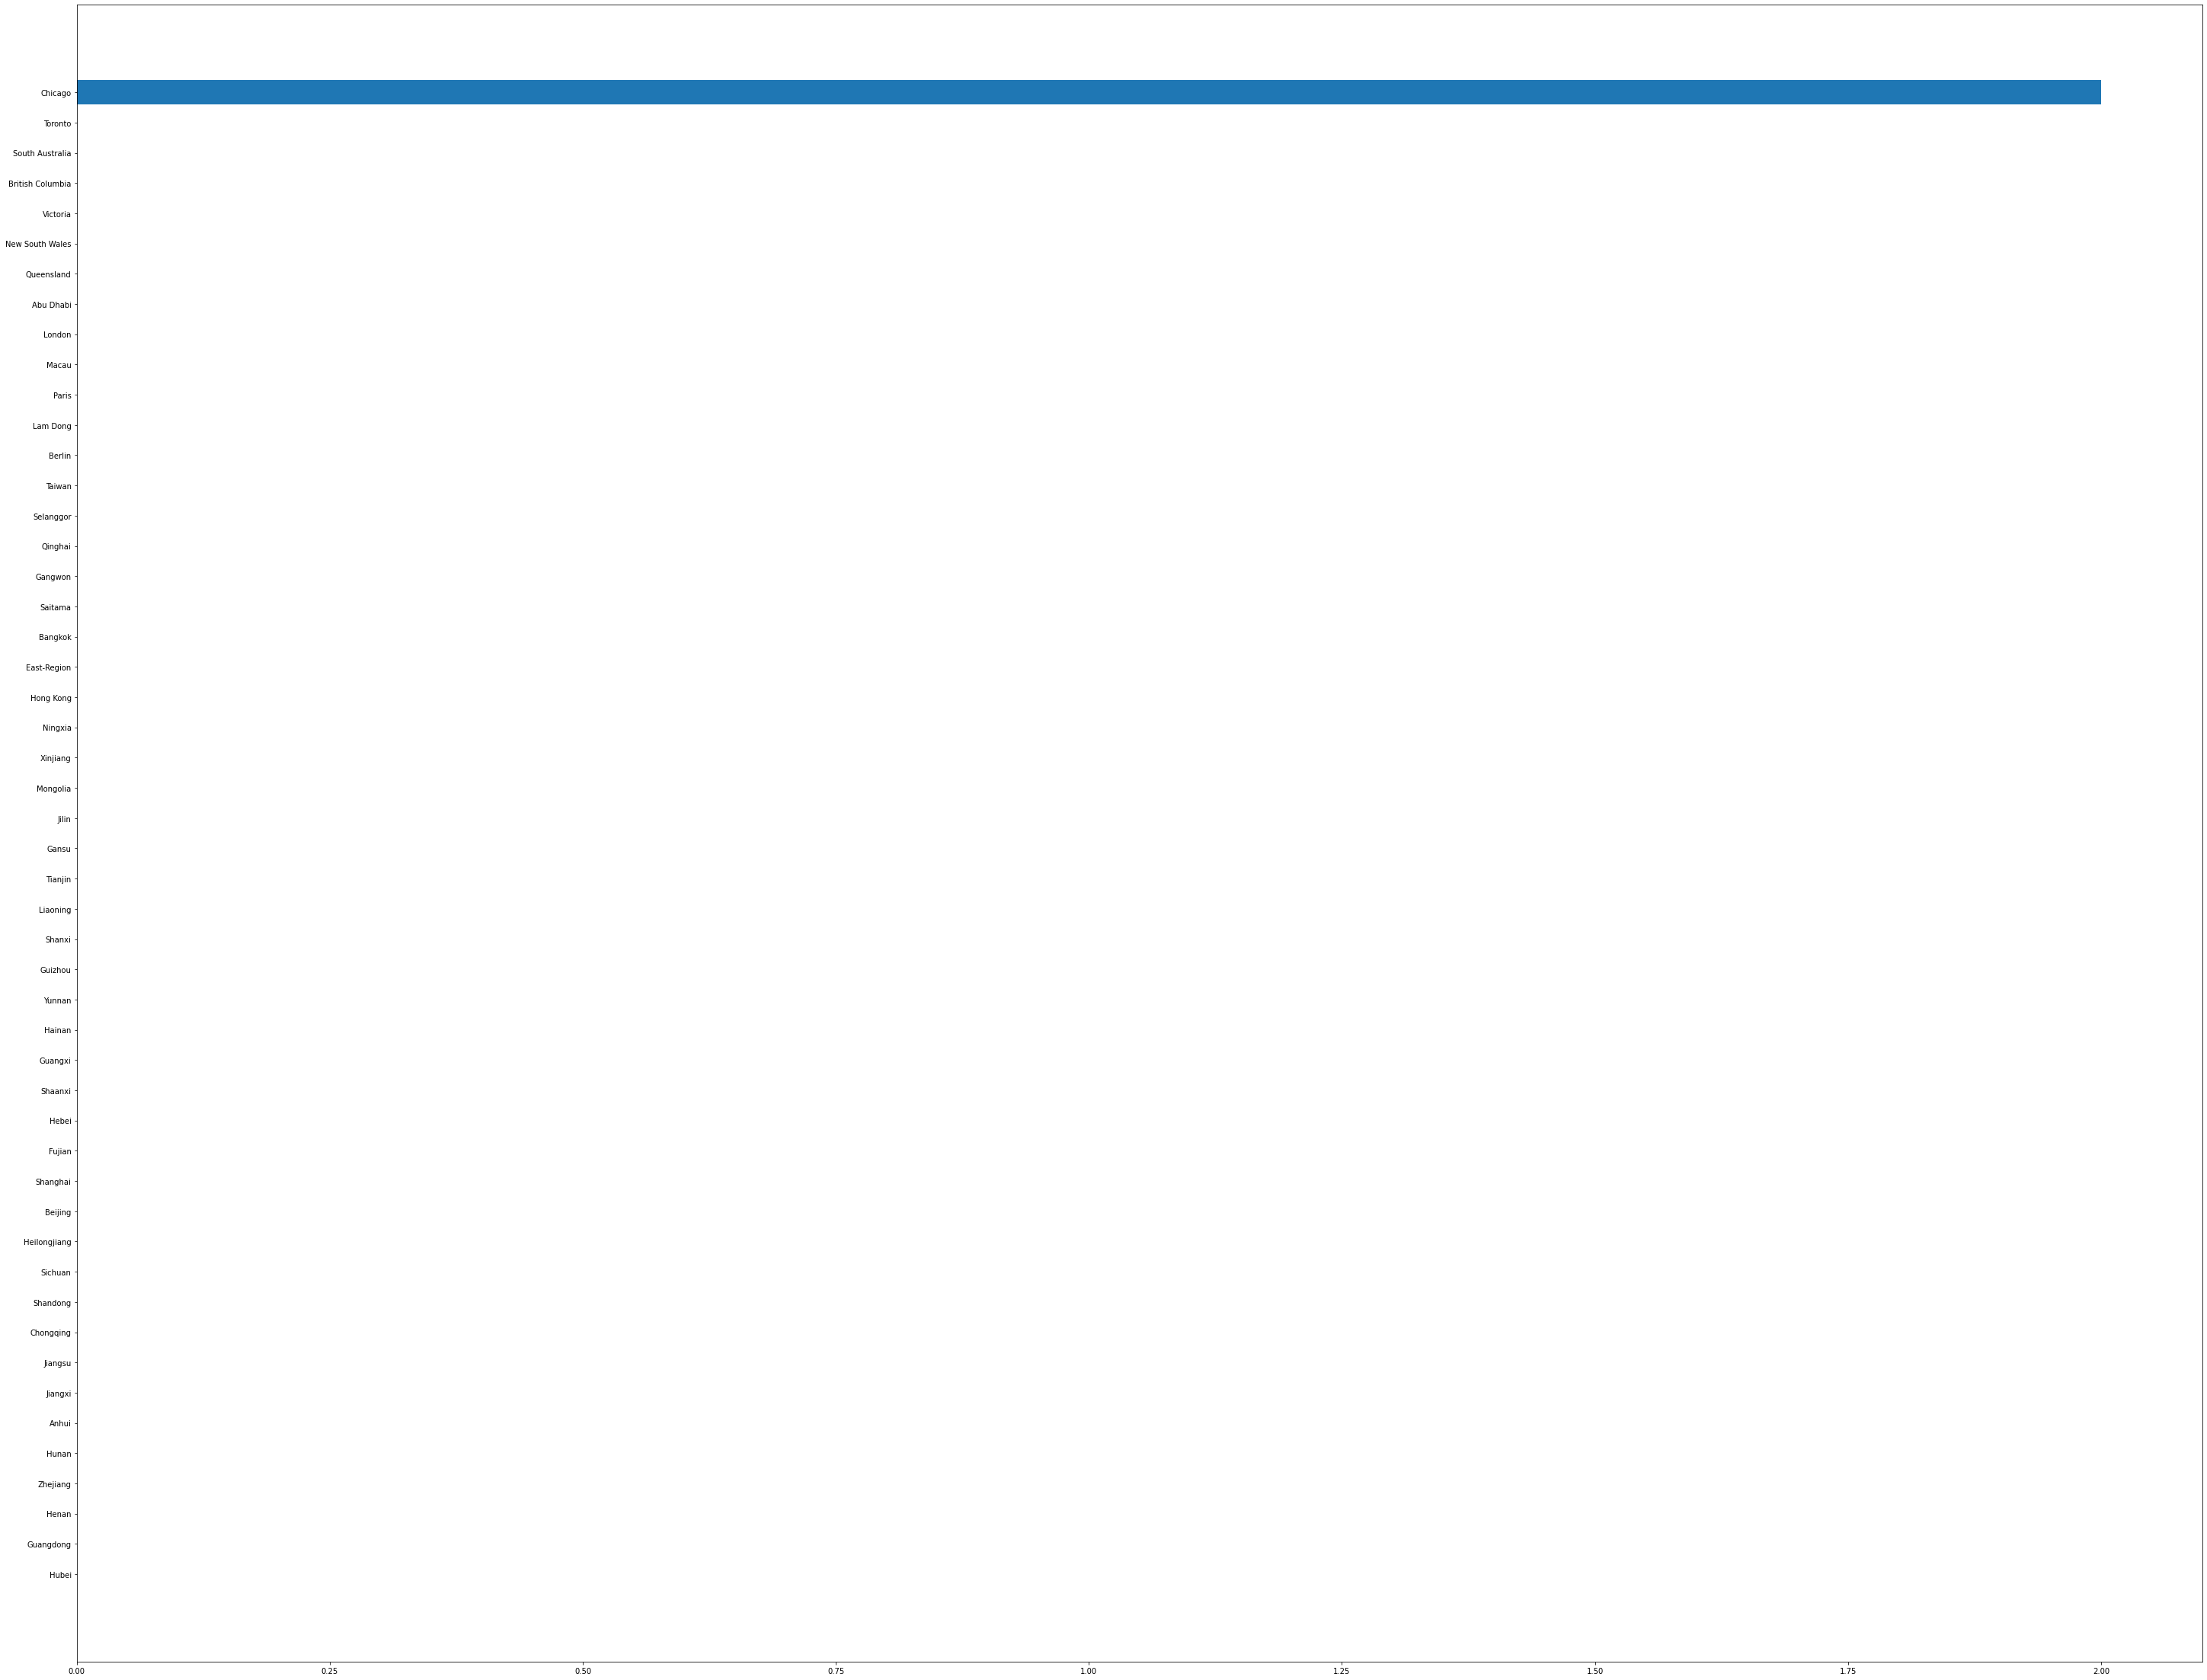

In [61]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

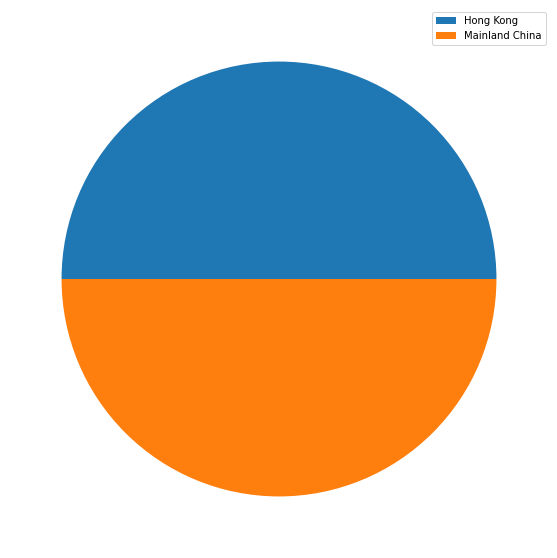

In [62]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

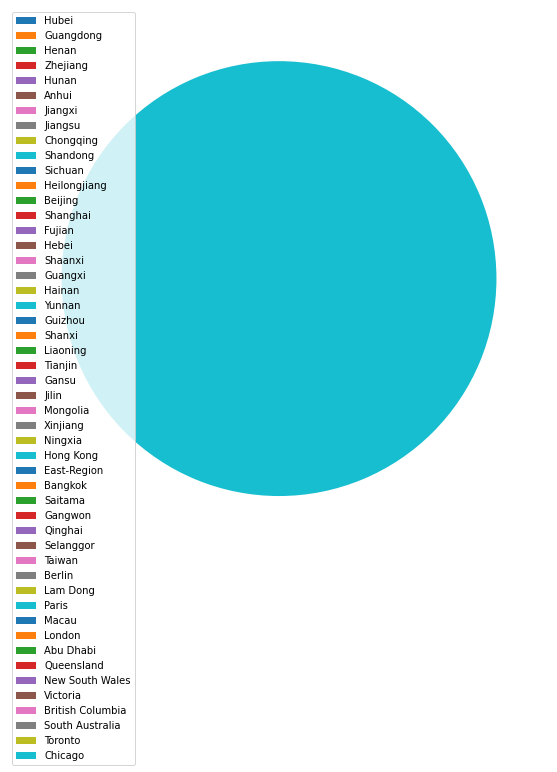

In [63]:
plt.figure(figsize=(10,10))
plt.pie(province_confirmed_case)
plt.legend(unique_provinces, loc='best')
plt.show()